## KNN

In [1]:
#import library
import csv #read csv file
import operator #sorting
import pandas as pd #build dataframe
import numpy as np #calculation
import matplotlib  #plotting
import matplotlib.pyplot as plt 
matplotlib.style.use('ggplot') #plotting style

#### read data

In [2]:
with open('Task1A_train.csv') as csvfile:
    #read csv file and spilt by comma
    readCSV1 = csv.reader(csvfile, delimiter=",")
    #rename and convert into a list
    trainingset=list(readCSV1)
    #remove header
    trainingset.pop(0)
    #change datatype to float
    trainset=[]
    for each in trainingset:
        each = [float(i) for i in each]
        trainset.append(each)
print(trainset)

[[1960.0, 0.71], [1960.5, 0.85], [1961.0, 0.61], [1961.5, 0.92], [1962.0, 0.72], [1962.5, 0.92], [1963.0, 0.83], [1963.5, 1.0], [1964.0, 0.92], [1964.5, 1.24], [1965.0, 1.16], [1965.5, 1.45], [1966.0, 1.26], [1966.5, 1.86], [1967.0, 1.53], [1967.5, 1.83], [1968.0, 1.53], [1968.5, 2.34], [1969.0, 2.16], [1969.5, 2.7], [1970.0, 2.79], [1970.5, 3.69], [1971.0, 3.6], [1971.5, 4.32], [1972.0, 4.86], [1972.5, 5.04], [1973.0, 5.58], [1973.5, 6.57], [1974.0, 6.03], [1974.5, 6.93], [1975.0, 6.93], [1975.5, 7.83], [1976.0, 7.74], [1976.5, 8.28], [1977.0, 9.54], [1977.5, 9.54], [1978.0, 11.88], [1978.5, 12.15], [1979.0, 14.04], [1979.5, 14.85], [1980.0, 16.2], [1980.5, 16.02]]


In [3]:
with open('Task1A_test.csv') as csvfile:
    readCSV2 = csv.reader(csvfile, delimiter=",")
    test_set=list(readCSV2)
    test_set.pop(0)
    testset=[]
    for each in test_set:
        each = [float(i) for i in each]
        testset.append(each)
print(testset)

[[1960.25, 0.63], [1960.75, 0.44], [1961.25, 0.69], [1961.75, 0.55], [1962.25, 0.77], [1962.75, 0.6], [1963.25, 0.8], [1963.75, 0.77], [1964.25, 1.0], [1964.75, 1.0], [1965.25, 1.3], [1965.75, 1.25], [1966.25, 1.38], [1966.75, 1.56], [1967.25, 1.59], [1967.75, 1.86], [1968.25, 2.07], [1968.75, 2.25], [1969.25, 2.43], [1969.75, 2.25], [1970.25, 3.42], [1970.75, 3.6], [1971.25, 4.32], [1971.75, 4.05], [1972.25, 5.04], [1972.75, 4.41], [1973.25, 5.85], [1973.75, 5.31], [1974.25, 6.39], [1974.75, 5.85], [1975.25, 7.74], [1975.75, 6.12], [1976.25, 8.91], [1976.75, 6.84], [1977.25, 10.26], [1977.75, 8.73], [1978.25, 12.06], [1978.75, 8.91], [1979.25, 12.96], [1979.75, 9.99], [1980.25, 14.67], [1980.75, 11.61]]


### STEP  I:
I.	Implement the KNN regressor function:

In [4]:
#calculate eulident distance
def euclideanDistance(x,y):
    x=np.array(x)
    y=np.array(y)
    dist = np.sqrt(np.sum((x-y)**2))
    return dist

In [5]:
#calculate average values
def average_value(value):
    length=len(value)
    average=sum(value)/length
    return average

In [6]:
#build a KNN model
def knn(train_data, train_label, test_data, k=3):
    distances = []
    test_label=[]
    neighbor_value=[]
    length = len(test_data)-1
    #for each test data point
    for each in range(len(test_data)):
        #to each training data points
        for x in range(len(train_data)):
            #calculate the distance between test data and each training data
            dist = euclideanDistance(test_data[each], train_data[x])
            distances.append((train_data[x], dist))
        #sort all of distances
        distances.sort(key=operator.itemgetter(1))
        #find first k values
        #print(distances)
        for num in distances[:k]:
            neighbor_value.append(num[0][1])
        #take average of values
        average_distance=average_value(neighbor_value)
        #print("a",average_distance)
        test_label.append(average_distance)
        neighbor_value=[]
        distances=[]
    return test_label

### Step2 II.	
Plot the training and the testing errors versus 1/K for K=1,..,20 in one plot

In [16]:
#extract training labels
train_label=[]
for each in trainset:
    train_label.append(each[1])

In [8]:
#calculate errors by using RMSE
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [9]:
#calculate training errors
train_error=[]
#for k=1,...20
for i in range(1,21):
    #forcast each K
    forecast=knn(trainset, train_label, trainset,i)
    #real label
    real_trainvalue=[i[1] for i in trainset]
    #calculate errors
    rmse_val1=rmse(np.array(forecast), np.array(real_trainvalue))
    train_error.append(rmse_val1)

In [10]:
#calculate test errors
test_error=[]
#for k=1,...20
for i in range(1,21):
    #for cast each K
    forecast=knn(trainset, train_label, testset, i)
    #extract real labels
    real_testvalue=[i[1] for i in testset]
    #calculate errors by RMSE
    rmse_val2=rmse(np.array(forecast), np.array(real_testvalue))
    test_error.append(rmse_val2)

In [11]:
#building a datafram contains K, training errors and test errors
df = pd.DataFrame({'k':[1/x for x in range(1,21)],
                   'train':train_error,
                   'test': test_error})
df = df.set_index('k')
df

,test,train
k,,
1.000000,0.393595,0.000000
0.500000,0.416314,0.150963
0.333333,0.432617,0.291446
0.250000,0.453375,0.325507
0.200000,0.366947,0.397632
0.166667,0.471709,0.465713
0.142857,0.499602,0.640534
0.125000,0.487701,0.791882
0.111111,0.503227,0.944432


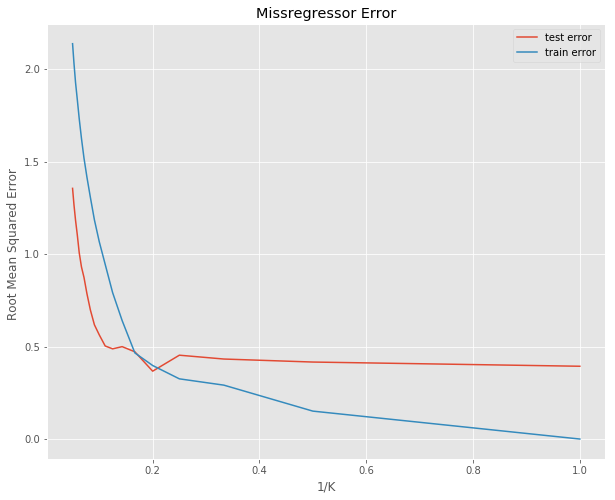

In [12]:
#plot a graph
plt.figure(figsize=(10,8))
plt.plot(df)

#set x-axis  label
plt.xlabel("1/K")
#set y-axis label
plt.ylabel("Root Mean Squared Error ")
#set title
plt.title('Missregressor Error')
plt.legend(labels=['test error','train error'])
plt.show()

### Summary:

III.  According to the plotting by Question II, the optimal value K should be 5 in terms of testing error. Because at this point, testing error is at the lowest and after that it increases when K increasing.  The Elbow method also shows the optimal K would be 5.  

Overfitting may occur when K is small because from the plotting we can see that KNN model fits perfectly to the training data (errors become smaller) and poorly to the test data (errors become larger). A model that has been overfit will generally have poor predictive performance, as it can exaggerate minor fluctuations in the data.

Underfitting may occur when K is in large values. Because at lower value of K, both training errors and testing errors are large, which means it will be obvious as it will have poor performance on the training data and testing data. Therefore, a model with lower K that can neither model the training data nor generalize to test data. 


Following is testing prediction values versus real values using K=5

In [13]:
#forecast when K=5
forecast_set=knn(trainset, train_label, testset, 5)

In [14]:
#build a datafrmame
df2 = pd.DataFrame({'x1': [x[0] for x in testset],
                   'real_value': [x[1] for x in testset],
                   'forecase_value': forecast_set})
df2 = df2.set_index('x1')
df2

,forecase_value,real_value
x1,,
1960.25,0.762,0.63
1960.75,0.762,0.44
1961.25,0.762,0.69
1961.75,0.800,0.55
1962.25,0.800,0.77
1962.75,0.878,0.60
1963.25,0.878,0.80
1963.75,0.982,0.77
1964.25,1.030,1.00


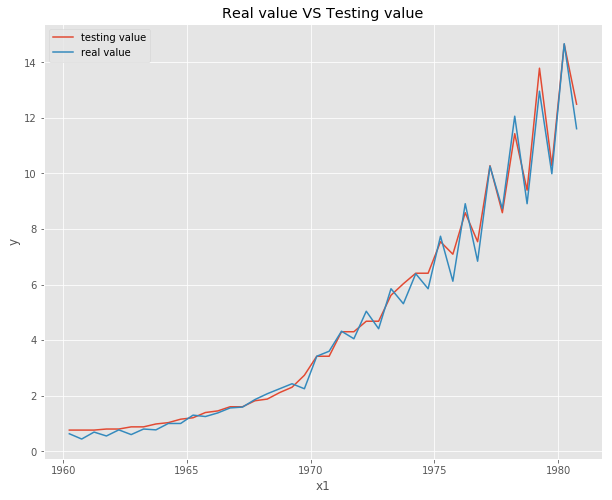

In [15]:
#plot a graph and see if it is overfitting or underfitting
plt.figure(figsize=(10,8))
plt.plot(df2)

#set x-axis  label
plt.xlabel("x1")
#set y-axis label
plt.ylabel("y")
#set title
plt.title('Real value VS Testing value')
plt.legend(labels=['testing value','real value'])
plt.show()